In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [3]:
data.shape

(731, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


In [5]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

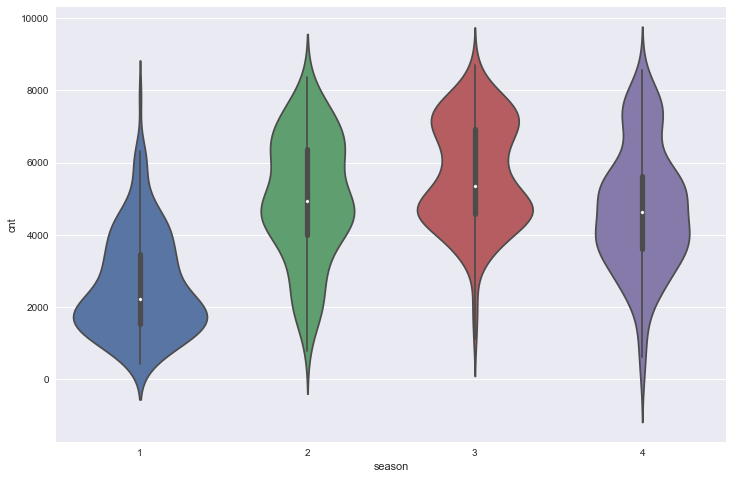

In [8]:
sns.violinplot(data['season'], data['cnt']);

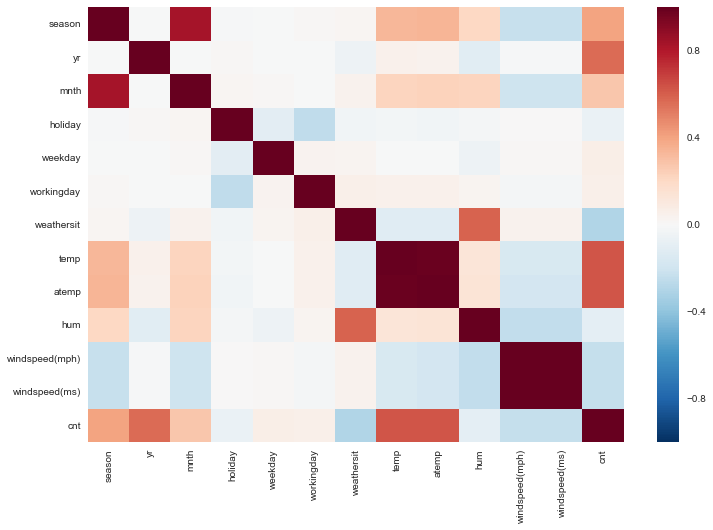

In [11]:
sns.heatmap(data.corr());

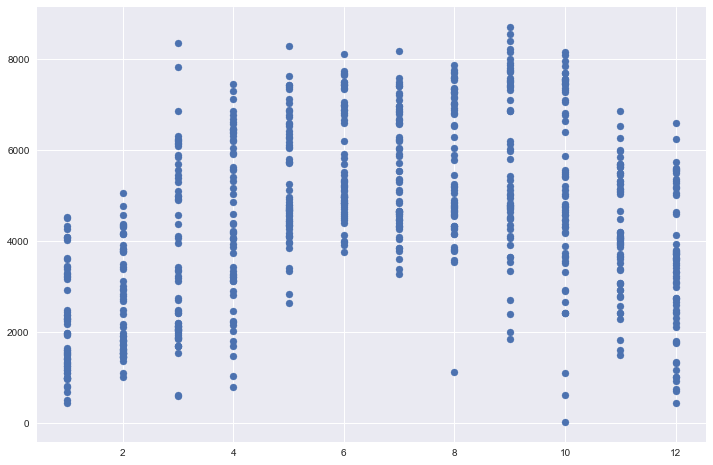

In [9]:
plt.scatter(data['mnth'], data['cnt']);

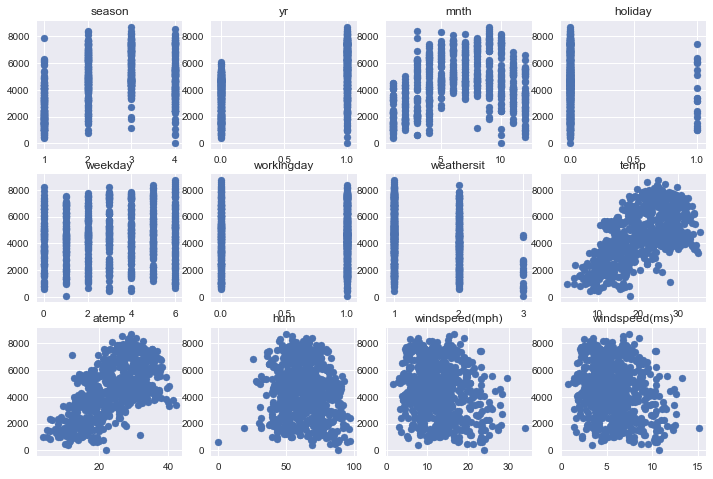

In [15]:
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

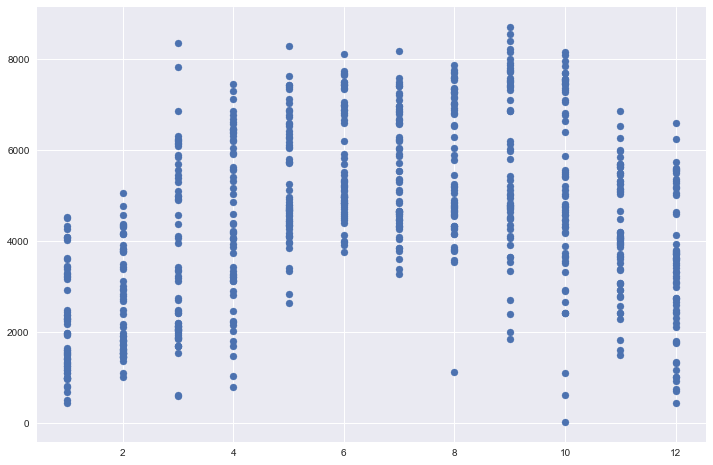

In [12]:
plt.scatter(data['mnth'], data['cnt'])

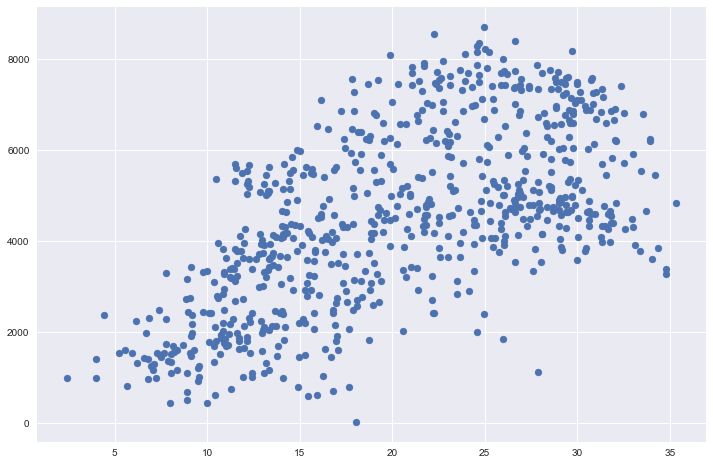

In [14]:
plt.scatter(data['temp'], data['cnt'])

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [16]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [20]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [21]:
train_part_size = int(0.7 * X.shape[0])

In [23]:
X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [26]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7951588144169

In [33]:
pd.DataFrame(linreg.coef_, data.columns[:-1], columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.048890e+12
yr,9.540707e+02
atemp,8.911724e+02
season,4.048574e+02
weekday,1.037115e+02
temp,6.248482e+01
mnth,3.081058e+01
workingday,1.470272e+01
holiday,-6.757443e+01
hum,-1.589774e+02


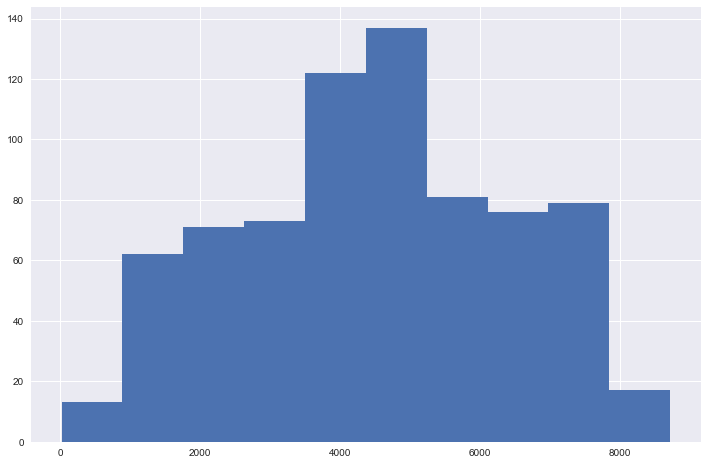

In [30]:
data['cnt'].hist();

In [58]:
def train_validate_report(model, X_train_scaled, y_train,
                          X_valid_scaled, y_valid,
                          feature_names, is_forest=False):
    model.fit(X_train_scaled, y_train)
    print("MSE =", np.sqrt(mean_squared_error(y_valid, model.predict(X_valid_scaled))))
    
    coef = model.feature_importances_ if is_forest else model.coef_
    coef_name = 'Importance' if is_forest else 'coef'

    print(pd.DataFrame(coef, feature_names, columns=[coef_name]
                      ).sort_values(by=coef_name, ascending=False))

In [59]:
train_validate_report(linreg, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE = 1121.79515881
                        coef
windspeed(ms)   3.048890e+12
yr              9.540707e+02
atemp           8.911724e+02
season          4.048574e+02
weekday         1.037115e+02
temp            6.248482e+01
mnth            3.081058e+01
workingday      1.470272e+01
holiday        -6.757443e+01
hum            -1.589774e+02
weathersit     -2.938159e+02
windspeed(mph) -3.048890e+12


In [42]:
train_validate_report(lasso, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE = 1120.72140949
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [43]:
train_validate_report(lasso_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE = 1241.82326093
                      coef
atemp           886.374386
yr              784.305733
season          272.280614
weekday          12.617944
mnth              0.000000
holiday          -0.000000
workingday        0.000000
temp              0.000000
windspeed(ms)    -0.000000
hum              -9.823886
windspeed(mph)  -77.728632
weathersit     -279.739913


In [44]:
train_validate_report(ridge, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE = 1119.56052021
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [45]:
train_validate_report(ridge_cv, X_train_scaled, y_train, X_valid_scaled, y_valid, feature_names=data.columns[:-1])

MSE = 1118.90354332
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [61]:
rforest = RandomForestRegressor(random_state=17, n_estimators=300)

In [66]:
train_validate_report(rforest, X_train, y_train, X_valid, y_valid,
                      feature_names=data.columns[:-1], is_forest=True)

MSE = 1047.29024387
                Importance
temp              0.294089
atemp             0.245640
yr                0.199903
hum               0.070260
season            0.063106
weathersit        0.030978
mnth              0.028512
windspeed(mph)    0.020166
weekday           0.019645
windspeed(ms)     0.019451
workingday        0.005460
holiday           0.002789
